<a href="https://colab.research.google.com/github/tjHendrixx/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [85]:
import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [86]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [87]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=False, time_on_site=179.5817602516308, mobile=False), User(purchased=False, time_on_site=110.56875658024208, mobile=True), User(purchased=True, time_on_site=76.50222430044718, mobile=True), User(purchased=False, time_on_site=64.15653474797843, mobile=False), User(purchased=False, time_on_site=116.47366804301578, mobile=False), User(purchased=False, time_on_site=296.503386352521, mobile=True), User(purchased=False, time_on_site=270.32030791557196, mobile=True), User(purchased=False, time_on_site=50.1930992860923, mobile=True), User(purchased=False, time_on_site=212.29430045822863, mobile=True), User(purchased=False, time_on_site=175.40449584912434, mobile=True)]


In [88]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,False,179.581760,False
1,False,110.568757,True
2,True,76.502224,True
3,False,64.156535,False
4,False,116.473668,False


In [89]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.944482115583105,5.950645787062074,6.062912723086642,6.265828654314898,6.717539532248576,6.861998884266821,7.118662868518085,7.743691928719708,8.091887886338313,8.690730249528285,8.828909243793237,8.863628544198846,9.344591699949849,9.430259588969884,10.125680456254981,10.133096095244392,10.751444319842744,11.612778762551343,11.879008182075928,12.08255383097851,12.419270890840416,12.627138134545545,13.03399367983434,13.218369671951626,13.236985371836479,14.666021240065563,14.822785197144238,15.037834503273407,15.142173022135454,15.49699181040941,15.934620706863196,16.290081137252784,16.424534182411865,16.590112095746647,16.82872398152608,16.91790802017462,17.050560351285856,17.05656054878351,18.116689376169358,18.32728691873157,...,468.96354515489134,471.6244967081034,473.6660058652838,475.36799771766675,480.46111892826514,486.32815001488115,488.73526025060403,490.9431833957757,494.7676575758358,498.58132351161197,507.90954967304685,507.9718002783436,509.23289372541956,510.58567599570125,512.5742291762089,513.3593548277571,515.6483347905972,516.6025636110217,517.3312699822211,517.4659109125178,519.1133693351487,519.5616554767546,519.67801969985,522.5157898674322,526.2139324168922,526.3606949982908,527.1278588778121,531.7177328244197,538.8989956873096,556.9350117005545,559.5236765175887,562.9911275691502,564.1943001460431,564.4941808858478,568.8905624343419,571.5096649877297,577.4028866019064,580.3889376886402,593.0547906849933,596.9330579963163
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,1,0,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,1,...,1,1,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0
True,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,1,0,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,0,0,1,0,0,1,1,1,1,0,1


In [90]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

TypeError: ignored

In [91]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

TypeError: ignored

In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [0]:
import pandas as pd 
import numpy as np

In [0]:
url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'

In [0]:
df = pd.read_csv(url, index_col = 0)

In [96]:
df.head(25)

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182
5,58,103,165
6,55,161,107
7,21,188,37
8,55,216,79
9,50,127,267


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 3 columns):
age              1200 non-null int64
weight           1200 non-null int64
exercise_time    1200 non-null int64
dtypes: int64(3)
memory usage: 37.5 KB


In [98]:
df.describe()

,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000
mean,48.396667,153.540833,134.910833
std,18.166802,35.132182,85.548895
min,18.000000,100.000000,0.000000
25%,33.000000,125.000000,65.000000
50%,48.000000,149.000000,122.000000
75%,64.000000,180.250000,206.000000
max,80.000000,246.000000,300.000000


In [99]:
pd.crosstab(df['weight'], df['exercise_time'],normalize='columns').head()

exercise_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,40,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,296,297,298,299,300
weight,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100,0.0,0.0,0.142857,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.166667,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
102,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.000000,0.0,0.0,0.166667,0.0,0.0,0.0,0.000000,0.5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.166667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
pd.crosstab(df['age'],df['weight'],normalize='columns').head()

weight,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,233,234,236,237,238,239,240,241,242,244,246
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,0.0,0.0,0.076923,0.0,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.090909,0.125,0.066667,0.0,0.0,0.000000,0.076923,0.000000,0.076923,0.000000,0.0,0.000000,0.058824,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.076923,0.000000,0.000000,0.153846,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000,0.000000,0.052632,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.090909,0.000000,0.111111,0.000000,0.111111,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.066667,0.000000,0.000000,0.0,...,0.0,0.166667,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.1,0.000000,0.0,0.000000,0.0,0.125,0.090909,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.066667,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.055556,0.000000,0.0,0.058824,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.076923,0.0,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.1,0.0,0.0,0.181818,0.000,0.000000,0.0,0.0,0.090909,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.066667,0.000000,0.076923,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.000000,0.0,0.111111,0.0,0.000,0.000000,0.052632,0.076923,0.0,0.0,0.0,0.0,0.000000,0.125,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.071429,0.111111,0.0,0.0,0.076923,0.000000,0.052632,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [101]:
pd.crosstab(df['age'], df['exercise_time'],normalize='columns').head()

exercise_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,40,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,296,297,298,299,300
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.125,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
20,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.2,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.2,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.125,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
pd.crosstab(df['weight'],df['age'],normalize='columns').head()

age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
weight,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.038462,0.000000,0.000000,0.0,0.038462,0.000000,0.0,0.0,0.133333,0.00,0.000000,0.045455,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.043478,0.0,0.000000,0.0,0.0,0.0,0.0,0.066667,0.090909,0.0,0.0,0.0,0.052632,0.000000,0.066667,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.05,0.000000,0.0625,0.0,0.0,0.133333,0.0
101,0.00,0.0,0.058824,0.000000,0.000000,0.0,0.058824,0.000000,0.066667,0.0000,0.000000,0.000000,0.000000,0.052632,0.0,0.000000,0.034483,0.0,0.0,0.066667,0.00,0.047619,0.000000,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.0625,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.052632,0.043478,0.000000,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0000,0.0,0.0,0.000000,0.0
102,0.05,0.0,0.000000,0.055556,0.000000,0.0,0.000000,0.052632,0.000000,0.0000,0.000000,0.038462,0.047619,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.04,0.000000,0.000000,0.0,0.125,0.076923,0.047619,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.043478,0.0,0.083333,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.05,0.055556,0.0000,0.0,0.0,0.000000,0.0
103,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0625,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.066667,0.00,0.000000,0.000000,0.0,0.125,0.000000,0.000000,0.0,0.076923,0.000000,0.0000,0.0,0.0,0.000000,0.0,0.083333,0.0,0.0,0.0,0.0,0.066667,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.000000,0.037037,0.0,0.0,0.05,0.000000,0.0000,0.0,0.0,0.000000,0.0
104,0.00,0.0,0.000000,0.000000,0.052632,0.0,0.000000,0.000000,0.000000,0.0000,0.041667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.047619,0.000000,0.0,0.000,0.076923,0.000000,0.1,0.000000,0.045455,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.05,0.0,0.105263,0.000000,0.0,0.0,0.00,0.000000,0.0000,0.0,0.0,0.000000,0.0


In [103]:
pd.crosstab(df['exercise_time'],df['weight'],normalize='columns').head()

weight,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,233,234,236,237,238,239,240,241,242,244,246
exercise_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.2,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
age_bins = pd.cut(df['age'], 5)  # 5 equal-sized bins

In [0]:
weight_bins = pd.cut(df['weight'],5)

In [0]:
exercise_bins = pd.cut(df['exercise_time'],5)

In [107]:
pd.crosstab(age_bins,df['weight'],normalize='columns')

weight,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,233,234,236,237,238,239,240,241,242,244,246
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(17.938, 30.4]",0.066667,0.3,0.384615,0.125,0.222222,0.2,0.25,0.090909,0.315789,0.230769,0.142857,0.4,0.125,0.20,0.454545,0.625,0.400000,0.285714,0.000000,0.454545,0.153846,0.222222,0.076923,0.222222,0.058824,0.166667,0.117647,0.066667,0.176471,0.071429,0.375,0.214286,0.222222,0.333333,0.090909,0.153846,0.200000,0.315789,0.307692,0.076923,...,0.222222,0.250000,0.2,0.00,0.0,0.222222,0.166667,0.375,0.00,0.000000,0.00,0.222222,0.0,0.333333,0.333333,0.166667,0.000000,0.0,0.0,0.333333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.333333,0.0,0.5,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"(30.4, 42.8]",0.266667,0.4,0.153846,0.250,0.111111,0.4,0.50,0.454545,0.157895,0.384615,0.142857,0.2,0.250,0.25,0.090909,0.125,0.400000,0.428571,0.333333,0.090909,0.461538,0.111111,0.307692,0.222222,0.411765,0.222222,0.352941,0.133333,0.235294,0.428571,0.000,0.214286,0.000000,0.222222,0.272727,0.153846,0.133333,0.210526,0.384615,0.153846,...,0.333333,0.250000,0.4,0.50,0.0,0.222222,0.333333,0.250,0.00,0.000000,0.25,0.111111,0.5,0.111111,0.333333,0.166667,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.333333,0.0,0.0,0.2,0.000000,0.666667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"(42.8, 55.2]",0.066667,0.1,0.307692,0.250,0.333333,0.2,0.00,0.181818,0.263158,0.153846,0.285714,0.2,0.000,0.15,0.272727,0.125,0.133333,0.071429,0.500000,0.272727,0.153846,0.444444,0.307692,0.000000,0.117647,0.333333,0.117647,0.333333,0.294118,0.285714,0.375,0.214286,0.333333,0.111111,0.181818,0.461538,0.000000,0.368421,0.000000,0.230769,...,0.000000,0.333333,0.0,0.00,0.5,0.000000,0.166667,0.000,0.25,0.285714,0.50,0.111111,0.5,0.222222,0.333333,0.000000,0.666667,0.0,0.0,0.000000,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.000000,0.000000,0.0,0.5,0.000000,0.5,0.0,0.0,0.0,0.5,0.0,0.0,1.0
"(55.2, 67.6]",0.333333,0.2,0.000000,0.125,0.000000,0.2,0.00,0.272727,0.052632,0.000000,0.071429,0.1,0.375,0.15,0.090909,0.125,0.066667,0.142857,0.166667,0.000000,0.153846,0.111111,0.153846,0.333333,0.117647,0.166667,0.235294,0.200000,0.294118,0.000000,0.000,0.142857,0.444444,0.222222,0.454545,0.153846,0.466667,0.052632,0.076923,0.153846,...,0.333333,0.083333,0.2,0.25,0.0,0.222222,0.000000,0.125,0.50,0.285714,0.25,0.333333,0.0,0.111111,0.000000,0.166667,0.000000,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,1.0,0.0,0.2,0.333333,0.000000,1.0,0.0,0.333333,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0
"(67.6, 80.0]",0.266667,0.0,0.153846,0.250,0.333333,0.0,0.25,0.000000,0.210526,0.230769,0.357143,0.1,0.250,0.25,0.090909,0.000,0.000000,0.071429,0.000000,0.181818,0.076923,0.111111,0.153846,0.222222,0.294118,0.111111,0.176471,0.266667,0.000000,0.214286,0.250,0.214286,0.000000,0.111111,0.000000,0.076923,0.200000,0.052632,0.230769,0.384615,...,0.111111,0.083333,0.2,0.25,0.5,0.333333,0.333333,0.250,0.25,0.428571,0.00,0.222222,0.0,0.222222,0.000000,0.500000,0.333333,1.0,1.0,0.666667,1.0,0.0,1.0,0.333333,0.0,1.0,0.6,0.666667,0.000000,0.0,0.0,0.333333,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [108]:
pd.crosstab(weight_bins,df['exercise_time'],normalize='columns')

exercise_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,40,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,296,297,298,299,300
weight,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(99.854, 129.2]",0.0,0.00,0.142857,0.333333,0.2,0.000000,0.000000,0.0,0.333333,0.000000,0.333333,0.0,0.0,0.166667,0.333333,0.2,0.4,0.181818,0.166667,0.0,0.2,0.250000,0.000000,0.5,0.4,0.333333,0.0,0.166667,0.166667,0.142857,0.000,0.000000,0.166667,0.333333,0.285714,0.428571,0.4,0.0,0.0,0.00,...,0.333333,1.0,0.5,0.25,0.5,0.8,0.666667,0.75,1.0,0.0,0.5,1.0,0.0,1.0,0.0,0.0,0.6,0.333333,0.333333,0.666667,0.666667,0.0,0.75,0.0,0.666667,0.5,1.0,0.8,0.666667,0.857143,0.0,0.666667,0.0,0.666667,1.0,1.0,0.5,0.5,1.0,0.4
"(129.2, 158.4]",0.0,0.25,0.000000,0.000000,0.0,0.142857,0.333333,1.0,0.000000,0.333333,0.000000,0.0,0.0,0.166667,0.000000,0.4,0.0,0.181818,0.166667,0.6,0.2,0.250000,0.142857,0.0,0.2,0.000000,0.5,0.166667,0.166667,0.142857,0.250,0.666667,0.000000,0.000000,0.285714,0.000000,0.0,0.0,0.0,0.25,...,0.666667,0.0,0.5,0.75,0.5,0.2,0.333333,0.25,0.0,1.0,0.5,0.0,0.0,0.0,1.0,1.0,0.4,0.666667,0.666667,0.333333,0.333333,1.0,0.25,1.0,0.333333,0.5,0.0,0.2,0.333333,0.142857,1.0,0.333333,1.0,0.333333,0.0,0.0,0.5,0.5,0.0,0.6
"(158.4, 187.6]",0.5,0.00,0.285714,0.166667,0.4,0.285714,0.000000,0.0,0.333333,0.000000,0.000000,0.0,1.0,0.000000,0.333333,0.2,0.4,0.272727,0.333333,0.0,0.2,0.166667,0.142857,0.0,0.2,0.000000,0.0,0.000000,0.000000,0.428571,0.375,0.333333,0.500000,0.166667,0.428571,0.142857,0.0,0.0,1.0,0.50,...,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
"(187.6, 216.8]",0.5,0.50,0.285714,0.000000,0.4,0.142857,0.333333,0.0,0.000000,0.666667,0.333333,0.0,0.0,0.500000,0.333333,0.2,0.2,0.272727,0.166667,0.2,0.4,0.250000,0.571429,0.0,0.2,0.333333,0.0,0.333333,0.333333,0.142857,0.375,0.000000,0.166667,0.166667,0.000000,0.142857,0.6,1.0,0.0,0.25,...,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
"(216.8, 246.0]",0.0,0.25,0.285714,0.500000,0.0,0.428571,0.333333,0.0,0.333333,0.000000,0.333333,1.0,0.0,0.166667,0.000000,0.0,0.0,0.090909,0.166667,0.2,0.0,0.083333,0.142857,0.5,0.0,0.333333,0.5,0.333333,0.333333,0.142857,0.000,0.000000,0.166667,0.333333,0.000000,0.285714,0.0,0.0,0.0,0.00,...,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
pd.crosstab(exercise_bins, df['weight'], normalize='columns')

weight,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,233,234,236,237,238,239,240,241,242,244,246
exercise_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(-0.3, 60.0]",0.333333,0.0,0.076923,0.125,0.222222,0.3,0.125,0.000000,0.052632,0.153846,0.142857,0.2,0.250,0.20,0.090909,0.00,0.200000,0.214286,0.166667,0.181818,0.153846,0.000000,0.076923,0.111111,0.176471,0.055556,0.117647,0.333333,0.058824,0.071429,0.250,0.142857,0.000000,0.222222,0.000000,0.076923,0.133333,0.052632,0.000000,0.230769,...,0.444444,0.416667,0.6,0.75,0.5,0.444444,0.666667,0.500,0.5,0.428571,0.5,0.444444,0.5,0.666667,0.666667,0.833333,0.666667,0.0,0.0,0.666667,0.0,1.0,0.5,1.0,1.0,1.0,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"(60.0, 120.0]",0.066667,0.1,0.153846,0.250,0.222222,0.0,0.250,0.181818,0.105263,0.307692,0.285714,0.0,0.125,0.15,0.181818,0.00,0.266667,0.142857,0.166667,0.181818,0.000000,0.444444,0.384615,0.333333,0.235294,0.111111,0.176471,0.000000,0.176471,0.285714,0.125,0.214286,0.222222,0.111111,0.181818,0.307692,0.266667,0.157895,0.153846,0.230769,...,0.444444,0.583333,0.4,0.25,0.5,0.555556,0.333333,0.375,0.5,0.571429,0.5,0.555556,0.5,0.333333,0.333333,0.166667,0.333333,1.0,1.0,0.333333,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(120.0, 180.0]",0.066667,0.2,0.230769,0.250,0.111111,0.2,0.250,0.363636,0.315789,0.230769,0.357143,0.3,0.250,0.10,0.272727,0.25,0.133333,0.000000,0.166667,0.181818,0.230769,0.111111,0.000000,0.111111,0.352941,0.277778,0.235294,0.066667,0.058824,0.071429,0.000,0.142857,0.111111,0.111111,0.181818,0.230769,0.133333,0.263158,0.384615,0.307692,...,0.111111,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.125,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(180.0, 240.0]",0.266667,0.5,0.230769,0.000,0.222222,0.1,0.125,0.272727,0.210526,0.307692,0.142857,0.2,0.125,0.25,0.090909,0.25,0.200000,0.214286,0.333333,0.181818,0.153846,0.333333,0.153846,0.222222,0.117647,0.166667,0.235294,0.066667,0.294118,0.357143,0.125,0.285714,0.222222,0.111111,0.181818,0.153846,0.333333,0.210526,0.230769,0.153846,...,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(240.0, 300.0]",0.266667,0.2,0.307692,0.375,0.222222,0.4,0.250,0.181818,0.315789,0.000000,0.071429,0.3,0.250,0.30,0.363636,0.50,0.200000,0.428571,0.166667,0.272727,0.461538,0.111111,0.384615,0.222222,0.117647,0.388889,0.235294,0.533333,0.411765,0.214286,0.500,0.214286,0.444444,0.444444,0.454545,0.230769,0.133333,0.315789,0.230769,0.076923,...,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns 

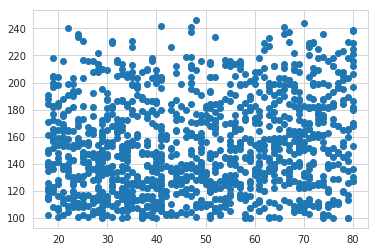

In [141]:
plt.scatter(df['age'],df['weight'])

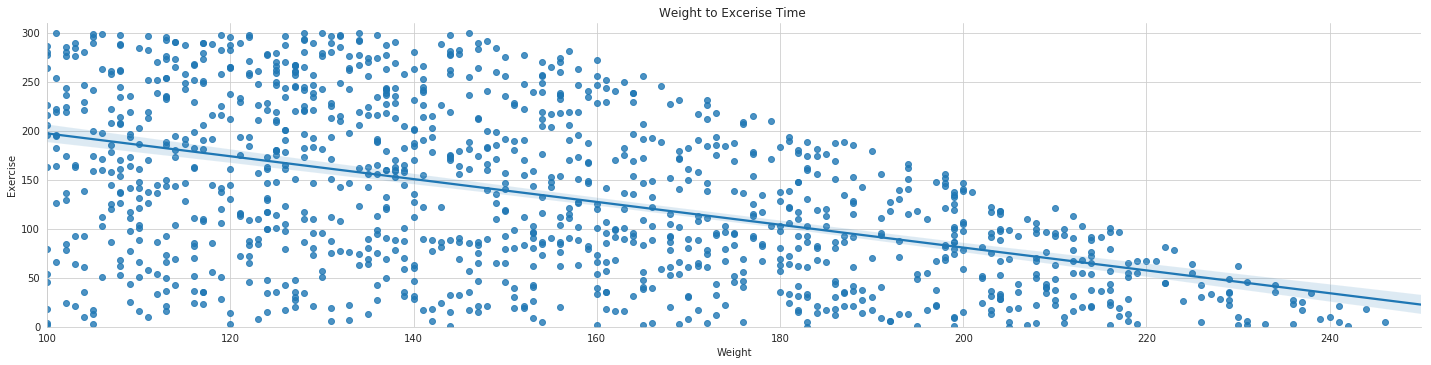

In [140]:
sns.set_style("whitegrid") 
plot = sns.lmplot(x="weight",y="exercise_time",data=df,aspect=4)
plot = (plot.set_axis_labels("Weight","Exercise").set(xlim=(100,250),ylim=(0,310)))
plt.title("Weight to Excerise Time ")
plt.show(plot)

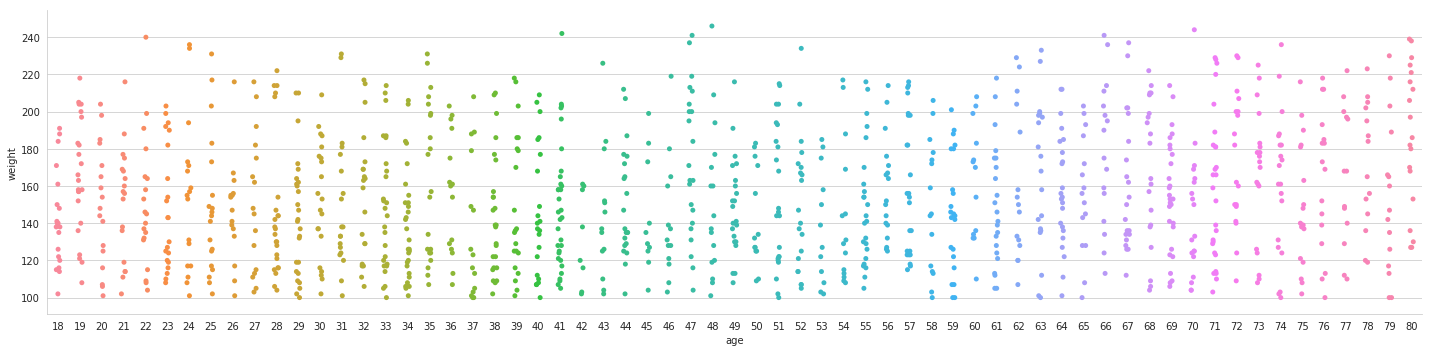

In [123]:
sns.catplot(x='age', y="weight",data=df, aspect=4)

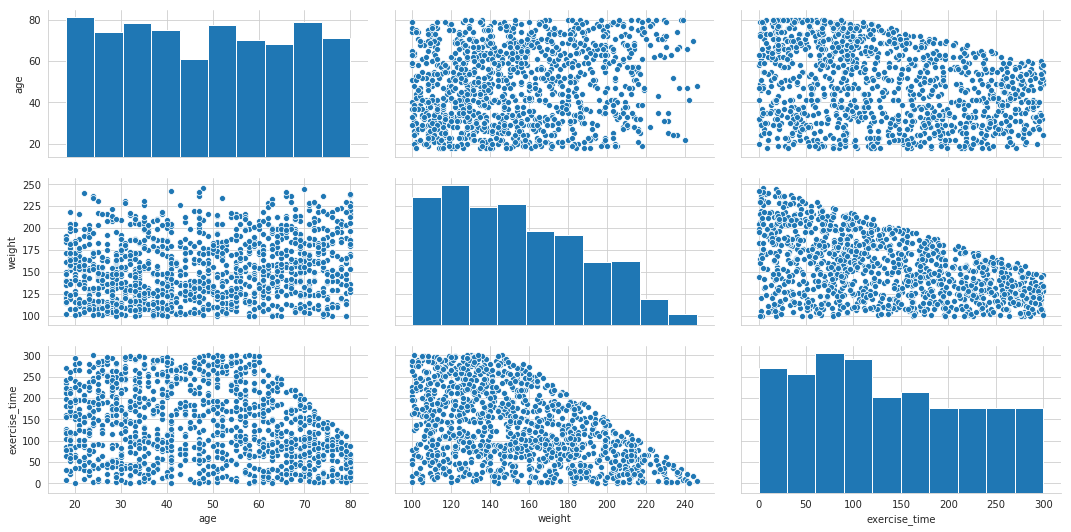

In [129]:
sns.pairplot(df, aspect=2);

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

        integers
  
        age weight time 
  
2.  What are the relationships between the variables?

        age to ex time / extime to age 

        weight to ex time /extime to weight 

        age to weight /weight to age 


3.  Which relationships are "real", and which spurious?


**Real**

    weight to extime 

    age to extime

**Spurious**

    age to weight


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)